In [37]:
#Instalación silenciosa del paquete missingno
%%capture
#los signos %% evita que se muestre output
!pip install missingno #el signo ! indica que es un comando


##Indicamos el orden correcto y bloque de importes (EDA)
1. Librerías base (Pandas y Numpy)
2. Visualización (Matplotlib, Seaborn y Missingno)
3. Utilidades específicas (configuracion: sns.set, estilo whitegrid y plt.rcPaams para el tamaño)
4. ML sklearn y Optuna (más adelante, no en EDA puro)
  Buena práctica:
  - EDA → sin sklearn
  - Preprocessing / Modeling → sklearn
  - Tuning → Optuna
  Más adelante, en otro notebook o sección: los importaremos, ya que Optna no entra en el Sprint 1 - EDA

*Python*
####*from sklearn.model_selection import train_test_split*
####*from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score*



In [38]:
#Librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes
import matplotlib.pyplot as plt # Creación de gráficos
sns.set(style="whitegrid") #utilidades especificas para visualización
plt.rcParams["figure.figsize"] = (10, 6) #utilidades especificas para visualización
df=pd.read_csv("cleaned_train.csv")


In [39]:
#Procedemos a cargar el dataset y visualizarlo
cleaned_train=pd.read_csv("cleaned_train.csv")

#visualización del dataset
cleaned_train.head() #muestra las primeras filas
cleaned_train.info() #ver los datatypes, valores faltantes
cleaned_train.describe() #stats de columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             188533 non-null  int64  
 1   brand          188533 non-null  object 
 2   model          188533 non-null  object 
 3   model_year     188533 non-null  int64  
 4   milage         188533 non-null  float64
 5   fuel_type      188533 non-null  object 
 6   transmission   188533 non-null  object 
 7   ext_col        188533 non-null  object 
 8   int_col        188533 non-null  object 
 9   accident       188533 non-null  object 
 10  clean_title    188533 non-null  object 
 11  price          188533 non-null  int64  
 12  car_age        188533 non-null  float64
 13  horsepower     188533 non-null  float64
 14  engine_size_L  188533 non-null  float64
 15  cylinders      188533 non-null  float64
dtypes: float64(5), int64(3), object(8)
memory usage: 23.0+ MB


,id,model_year,milage,price,car_age,horsepower,engine_size_L,cylinders
count,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000
mean,94266.000000,2015.829998,65397.767531,37203.735537,10.095055,338.395846,3.782440,6.292405
std,54424.933488,5.660967,48748.009000,25835.226624,5.444858,96.924358,1.303176,1.372608
min,0.000000,1974.000000,100.000000,2000.000000,2.000000,107.500000,0.650000,3.000000
25%,47133.000000,2013.000000,24115.000000,17000.000000,6.000000,280.000000,3.000000,6.000000
50%,94266.000000,2017.000000,57785.000000,30825.000000,9.000000,329.000000,3.500000,6.000000
75%,141399.000000,2020.000000,95400.000000,49900.000000,13.000000,395.000000,4.600000,8.000000
max,188532.000000,2024.000000,202327.500000,99250.000000,23.500000,567.500000,7.000000,11.000000


##1. Procedemos con las 5 visualizaciones:


1. Target distribution plot
2. Price vs mileage scatter
3. Price vs model year scatter
4. Categorical vs price boxplots
5. Correlation heatmap




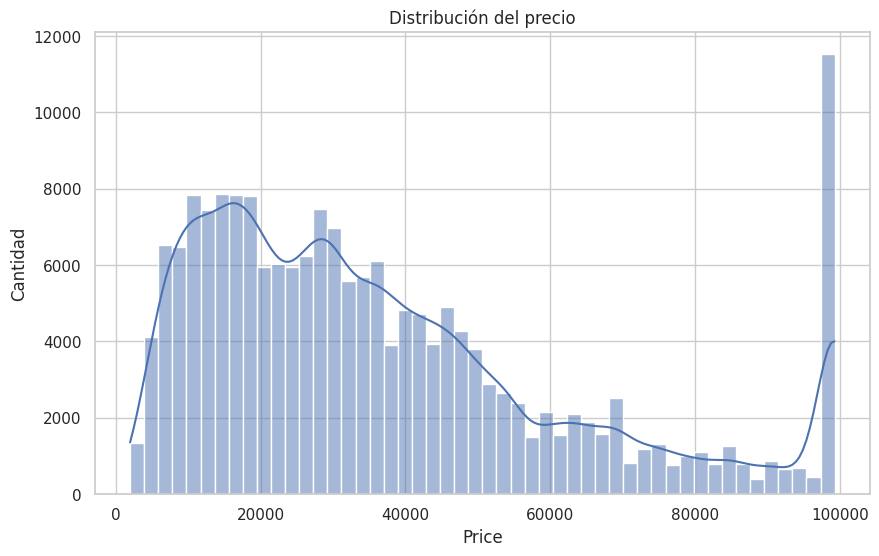

In [40]:
#1. Target distribution plot
#Aquí Queremos ver cómo se distribuye la variable objetivo price
plt.figure(figsize=(10,6))
sns.histplot(cleaned_train['price'], bins=50, kde=True)
plt.title("Distribución del precio")
plt.xlabel("Price")
plt.ylabel("Cantidad")
plt.show()
#esto nos da un panorama de la distribución de price: si es simétrica, sesgada, con outliers, etc.

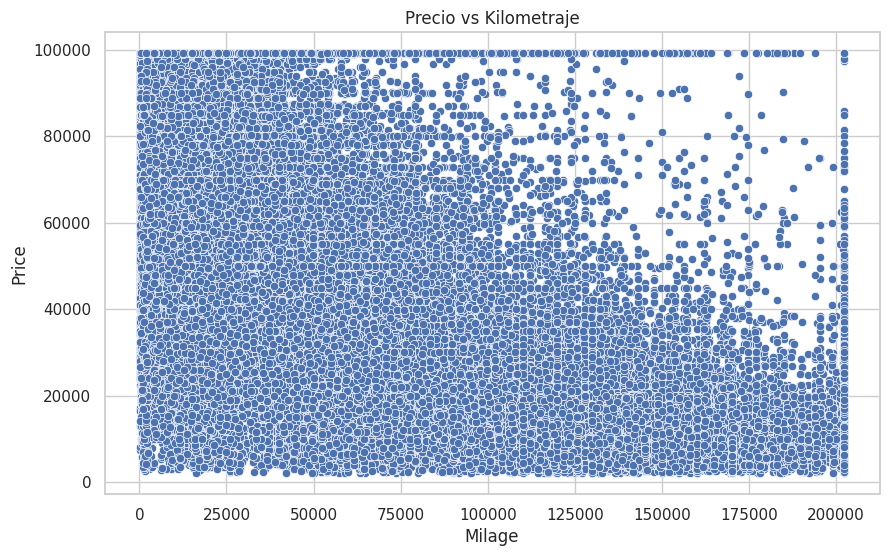

In [41]:
# 2. Price vs Mileage Scatter
#relacionamos price con milage para ver si hay tendencia
plt.figure(figsize=(10,6))
sns.scatterplot(x='milage', y='price', data=cleaned_train)
plt.title("Precio vs Kilometraje")
plt.xlabel("Milage")
plt.ylabel("Price")
plt.show()
#Aqui observamos si los precios tienden a bajar cuando aumenta el kilometraje

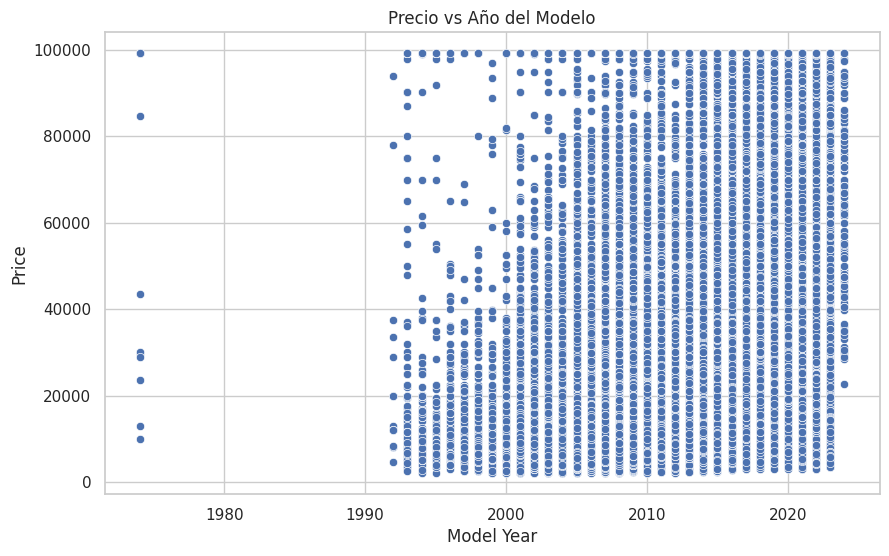

In [42]:
#3. Price vs model year scater
#Aqui comprobaremos la relación entre precio y año del modelo (model_year)
plt.figure(figsize=(10,6))
sns.scatterplot(x='model_year', y='price', data=cleaned_train)
plt.title("Precio vs Año del Modelo")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()

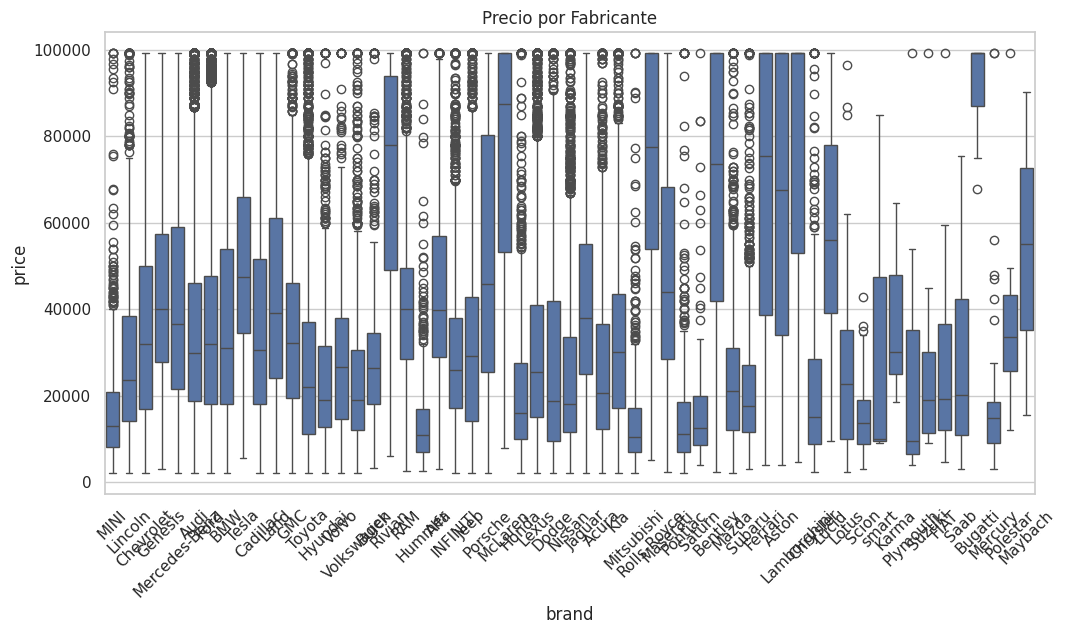

In [43]:
#4. Categorical vs Price Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='price', data=cleaned_train)
plt.title("Precio por Fabricante")
plt.xticks(rotation=45)
plt.show()

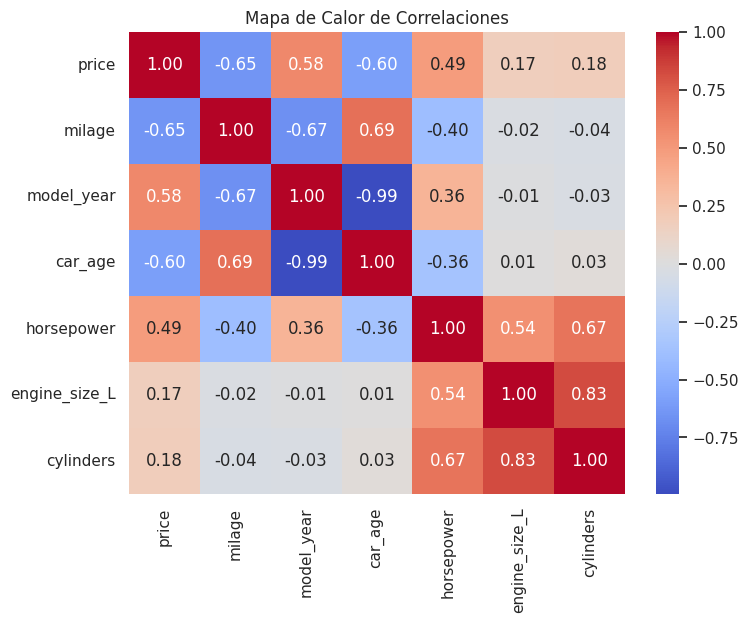

In [44]:
#5 Correlation heatmap
#seleccionamos columnas numéricas relevantes para predecir precio:
num_cols = ['price', 'milage', 'model_year', 'car_age', 'horsepower', 'engine_size_L', 'cylinders']
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()
#Esto ayuda a identificar variables fuertemente relacionadas con price, posibles predictores para modelado.